In [1]:
import pandas as pd
import re
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns

plt.style.use('./deeplearning.mplstyle')

RANDOM_STATE = 42

In [2]:
df = pd.read_csv("training_spam_text.csv")

In [3]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Type'])

In [4]:
# Exclude the target column
features = [x for x in df.columns if x != 'Type']  # Exclude 'type' column
print(len(features))

5


In [5]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], y, test_size=0.2, random_state=42)

print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_test)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 800
validation samples: 200
target proportion: 0.4950


In [6]:
# Building decision tree 
# min_samples_split: The minimum number of samples required to split an internal ndoe
# max_depth: The maximum depth of the tree
# An additionaly hyperparameter for Random Forest is called n_estimators, which is the 
# number of Decision Tress that make up the Random Forest

min_samples_split_list = [2, 5, 10, 15, 20, 30, 40, 50, 60, 80, 100, 150, 200, 250, 300, 700]
max_depth_list = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 16, 20, 32, 40, 64, None]
n_estimators_list = [10, 20, 50, 75, 100, 200, 500, 1000]

In [7]:
# Min Sample Split

accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:

    model = DecisionTreeClassifier(min_samples_split=min_samples_split,
                                   random_state=42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"min_samples_split={min_samples_split}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

# plt.title('Train x Validation metrics')
# plt.xlabel('min_samples_split')
# plt.ylabel('accuracy')
# plt.xticks(ticks= range(len(min_samples_split_list)), labels=min_samples_split_list)
# plt.plot(accuracy_list_train)
# plt.plot(accuracy_list_val)
# plt.legend(['Train', 'Validation'])

min_samples_split=2, Train Accuracy=1.0000, Validation Accuracy=0.8000
min_samples_split=5, Train Accuracy=0.9725, Validation Accuracy=0.8050
min_samples_split=10, Train Accuracy=0.9350, Validation Accuracy=0.8150
min_samples_split=15, Train Accuracy=0.9187, Validation Accuracy=0.8200
min_samples_split=20, Train Accuracy=0.9113, Validation Accuracy=0.8300
min_samples_split=30, Train Accuracy=0.9025, Validation Accuracy=0.8450
min_samples_split=40, Train Accuracy=0.8900, Validation Accuracy=0.8300
min_samples_split=50, Train Accuracy=0.8712, Validation Accuracy=0.8150
min_samples_split=60, Train Accuracy=0.8662, Validation Accuracy=0.8200
min_samples_split=80, Train Accuracy=0.8662, Validation Accuracy=0.8200


min_samples_split=100, Train Accuracy=0.8662, Validation Accuracy=0.8200
min_samples_split=150, Train Accuracy=0.8638, Validation Accuracy=0.8200
min_samples_split=200, Train Accuracy=0.8638, Validation Accuracy=0.8200
min_samples_split=250, Train Accuracy=0.8638, Validation Accuracy=0.8200
min_samples_split=300, Train Accuracy=0.8638, Validation Accuracy=0.8200
min_samples_split=700, Train Accuracy=0.8488, Validation Accuracy=0.8050


In [8]:
# Max depth 

accuracy_list_train = []
accuracy_list_val = []

for max_depth in max_depth_list:

    model = DecisionTreeClassifier(max_depth=max_depth,
                                   random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"max_depth={max_depth}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

# plt.title('Train x Validation metrics')
# plt.xlabel('max_depth')
# plt.ylabel('accuracy')
# plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
# plt.plot(accuracy_list_train)
# plt.plot(accuracy_list_val)
# plt.legend(['Train','Validation'])

max_depth=1, Train Accuracy=0.8488, Validation Accuracy=0.8050
max_depth=2, Train Accuracy=0.8625, Validation Accuracy=0.8150
max_depth=3, Train Accuracy=0.8700, Validation Accuracy=0.8250
max_depth=4, Train Accuracy=0.8838, Validation Accuracy=0.8350
max_depth=5, Train Accuracy=0.8975, Validation Accuracy=0.8100
max_depth=6, Train Accuracy=0.9062, Validation Accuracy=0.8200
max_depth=7, Train Accuracy=0.9313, Validation Accuracy=0.8150
max_depth=8, Train Accuracy=0.9450, Validation Accuracy=0.8200
max_depth=10, Train Accuracy=0.9637, Validation Accuracy=0.8250
max_depth=12, Train Accuracy=0.9750, Validation Accuracy=0.8150
max_depth=16, Train Accuracy=0.9975, Validation Accuracy=0.8050
max_depth=20, Train Accuracy=1.0000, Validation Accuracy=0.8000
max_depth=32, Train Accuracy=1.0000, Validation Accuracy=0.8000
max_depth=40, Train Accuracy=1.0000, Validation Accuracy=0.8000
max_depth=64, Train Accuracy=1.0000, Validation Accuracy=0.8000
max_depth=None, Train Accuracy=1.0000, Validatio

In [9]:
# N Estimators

accuracy_list_train = []
accuracy_list_val = []

for n_estimators in n_estimators_list:

    model = RandomForestClassifier(n_estimators=n_estimators,
                                   random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"n_estimators={n_estimators}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

# plt.title('Train x Validation metrics')
# plt.xlabel('n_estimators')
# plt.ylabel('accuracy')
# plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
# plt.plot(accuracy_list_train)
# plt.plot(accuracy_list_val)
# plt.legend(['Train','Validation'])

n_estimators=10, Train Accuracy=0.9825, Validation Accuracy=0.8450
n_estimators=20, Train Accuracy=0.9975, Validation Accuracy=0.8300
n_estimators=50, Train Accuracy=1.0000, Validation Accuracy=0.8450
n_estimators=75, Train Accuracy=1.0000, Validation Accuracy=0.8500
n_estimators=100, Train Accuracy=1.0000, Validation Accuracy=0.8450
n_estimators=200, Train Accuracy=1.0000, Validation Accuracy=0.8450
n_estimators=500, Train Accuracy=1.0000, Validation Accuracy=0.8450
n_estimators=1000, Train Accuracy=1.0000, Validation Accuracy=0.8450


In [10]:
random_forest_model = RandomForestClassifier(min_samples_split = 100,
                                             max_depth = 3,
                                             n_estimators = 1000).fit(X_train,y_train)

In [11]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.8612
Metrics test:
	Accuracy score: 0.8150


In [12]:
n = int(len(X_train)*0.8) 

In [13]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [14]:
# eval_set = [(X_train_eval,y_train_eval)]:Here we must pass a list to the eval_set, because you can have several different tuples ov eval sets.
# early_stopping_rounds: This parameter helps to stop the model training if its evaluation metric is no longer improving on the validation set. It's set to 10.

# This code builds and trains a smart model to make predictions, and it tries to avoid overfitting by stopping early if the model stops improving.
# xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE, early_stopping_rounds = 15)
xgb_model = XGBClassifier(n_estimators = 200, learning_rate = 0.01,verbosity = 1, random_state = RANDOM_STATE, early_stopping_rounds=10)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-logloss:0.68845
[1]	validation_0-logloss:0.68267
[2]	validation_0-logloss:0.67688
[3]	validation_0-logloss:0.67131
[4]	validation_0-logloss:0.66588
[5]	validation_0-logloss:0.66041
[6]	validation_0-logloss:0.65523
[7]	validation_0-logloss:0.65026
[8]	validation_0-logloss:0.64521
[9]	validation_0-logloss:0.64031
[10]	validation_0-logloss:0.63563
[11]	validation_0-logloss:0.63072
[12]	validation_0-logloss:0.62620
[13]	validation_0-logloss:0.62177
[14]	validation_0-logloss:0.61725
[15]	validation_0-logloss:0.61285
[16]	validation_0-logloss:0.60866
[17]	validation_0-logloss:0.60424
[18]	validation_0-logloss:0.60022
[19]	validation_0-logloss:0.59625
[20]	validation_0-logloss:0.59221
[21]	validation_0-logloss:0.58819
[22]	validation_0-logloss:0.58413
[23]	validation_0-logloss:0.58035
[24]	validation_0-logloss:0.57671
[25]	validation_0-logloss:0.57289
[26]	validation_0-logloss:0.56938
[27]	validation_0-logloss:0.56598
[28]	validation_0-logloss:0.56240
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [15]:
# Generate predictions on test data
y_pred_url = xgb_model.predict(X_test)

# Save predictions for meta-model training
url_predictions = pd.DataFrame({"text_pred": y_pred_url, "type": y_test})
url_predictions.to_csv("text_model_predictions.csv", index=False)

In [16]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9137
Metrics test:
	Accuracy score: 0.8450


[[85 11]
 [20 84]]


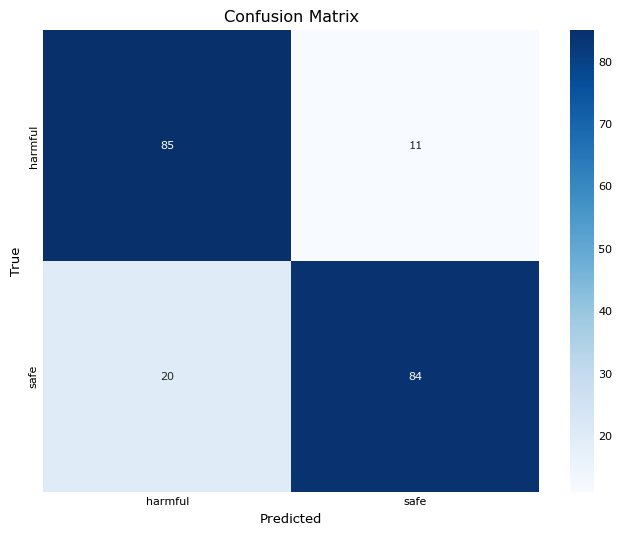

In [17]:
cm = confusion_matrix(y_test, xgb_model.predict(X_test))
print(cm)
# Get the confusion matrix
cm = confusion_matrix(y_test, xgb_model.predict(X_test))

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [18]:
print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        96
           1       0.88      0.81      0.84       104

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.84       200



                Feature  Importance
0           text_length       0.154
2       avg_word_length       0.039
1             num_words       0.031
3  num_suspicious_words       0.026
4      num_exclamations       0.016


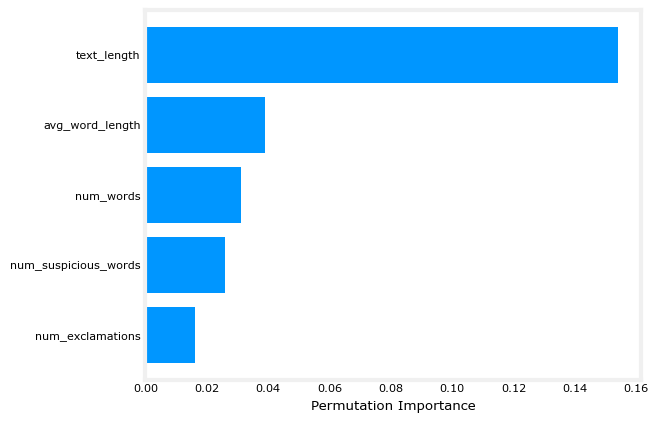

In [19]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test, scoring="accuracy")

importance_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

print(importance_df)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

In [20]:
def extract_features(text):
    
    feature = {}
    
    text = text.lower()
    tokenizer = TreebankWordTokenizer()
    tokens = tokenizer.tokenize(text) 
    tokens = [word for word in tokens if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    feature['text_length'] = len(text)
    feature['num_words'] = len(tokens)
    feature['avg_word_length'] = sum(len(word) for word in tokens) / len(tokens) if len(tokens) > 0 else 0

    suspicious_words = ['free', 'win', 'urgent', 'click', 'buy', 'money', 'offer']
    feature['num_suspicious_words'] = sum(1 for word in tokens if word in suspicious_words)

    feature['num_exclamations'] = text.count('!')

    return feature

In [21]:
text = "u r subscribed 2 TEXTCOMP 250 wkly comp. 1st wk?s free question follows, subsequent wks charged@150p/msg.2 unsubscribe txt STOP 2 84128,custcare 08712405020"
# text = "Nur Deeni Binti Deti Affendi"

new_features = extract_features(text)

new_features_df = pd.DataFrame([new_features])

prediction = random_forest_model.predict(new_features_df)

predicted_class = label_encoder.inverse_transform(prediction)

print(f"Prediction for Text '{text}': {predicted_class[0]}")

Prediction for Text 'u r subscribed 2 TEXTCOMP 250 wkly comp. 1st wk?s free question follows, subsequent wks charged@150p/msg.2 unsubscribe txt STOP 2 84128,custcare 08712405020': harmful


In [22]:
# import joblib
# joblib.dump(xgb_model, "text_model.joblib")

# xgb_model.save_model("text_model.json")